<a href="https://www.kaggle.com/code/nitinsoni1/predict-gold-price?scriptVersionId=95452914" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Install yfinance

In [1]:
pip install yfinance

  Preparing metadata (setup.py) ... - done
  Created wheel for multitasking: filename=multitasking-0.0.10-py3-none-any.whl size=8500 sha256=77388706c7f4499853ad3fc690bda356c8dae29b14924f9bbc9585e43c3593b5
  Stored in directory: /root/.cache/pip/wheels/34/ba/79/c0260c6f1a03f420ec7673eff9981778f293b9107974679e36
Successfully built multitasking
Note: you may need to restart the kernel to use updated packages.


# Importing libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
%matplotlib inline

# Get the Data

In [3]:
df =  yf.download('GLD','2008-01-01','2022-05-12')
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-01-02,83.559998,85.139999,83.440002,84.860001,84.860001,12291100
2008-01-03,84.870003,85.940002,84.599998,85.570000,85.570000,9553900
2008-01-04,85.339996,85.550003,84.430000,85.129997,85.129997,8402200
2008-01-07,85.239998,85.260002,84.570000,84.769997,84.769997,6944300
2008-01-08,86.279999,87.129997,86.160004,86.779999,86.779999,9567900


In [4]:
df = df[['Close']]
df.head()

,Close
Date,
2008-01-02,84.860001
2008-01-03,85.570000
2008-01-04,85.129997
2008-01-07,84.769997
2008-01-08,86.779999


**checking for missing values**

<AxesSubplot:ylabel='Date'>

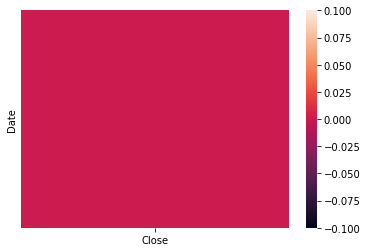

In [5]:

sns.heatmap(df.isnull(),yticklabels = False)

**graphical representation of gold price vs year**

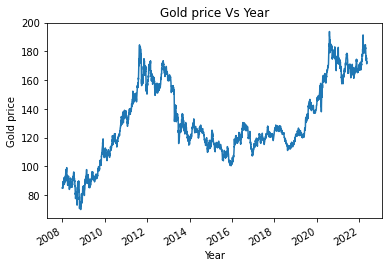

In [6]:

plt.title('Gold price Vs Year')  #-----title of plot
df.Close.plot()                  #---plot according to close value

# defining x& y axis
plt.xlabel('Year')
plt.ylabel('Gold price')

#show the graph
plt.show()

In [7]:
df['MA_15'] = df['Close'].rolling(window = 15).mean()

df['MA-30'] = df['Close'].rolling(window = 30).mean()
df = df.dropna()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


**visulization of moving average 15, 30 days vs  close value**

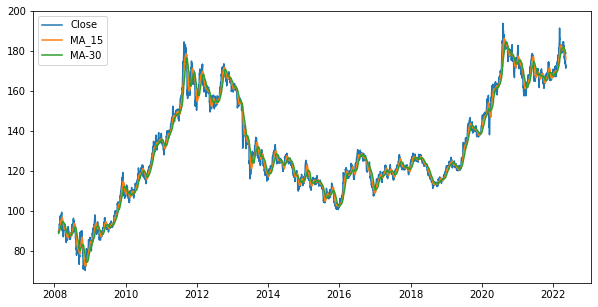

In [8]:

plt.figure(figsize =(10,5))
plt.plot(df['Close'],label = 'Close_price')
plt.plot(df['MA_15'],label = ' moving average 15days')
plt.plot(df['MA-30'],label = 'moving average 30 days')

plt.legend(['Close','MA_15','MA-30'])
plt.show()

# train & test  spliting

In [9]:


X = df[['MA_15','MA-30']]
y = df['Close']

t = 0.8
t = int(t*len(df))
X_train,X_test,y_train,y_test = X[:t].round(4),X[t:].round(4),y[:t].round(4),y[t:].round(4)

#print(X_train,X_test,y_train,y_test)

In [10]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
df = df.dropna()
df.isnull().sum()
df = df[['Close','MA_15','MA-30']].round(2)
df.info()
reg.fit(X_train,y_train)
#y = m1* X1 + m2* X2 + C
m1 = reg.coef_[0]
m2 = reg.coef_[1]
c  = reg.intercept_

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3587 entries, 2008-02-13 to 2022-05-11
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   3587 non-null   float64
 1   MA_15   3587 non-null   float64
 2   MA-30   3587 non-null   float64
dtypes: float64(3)
memory usage: 112.1 KB


**visualization through actual price vs predicted price of gold**

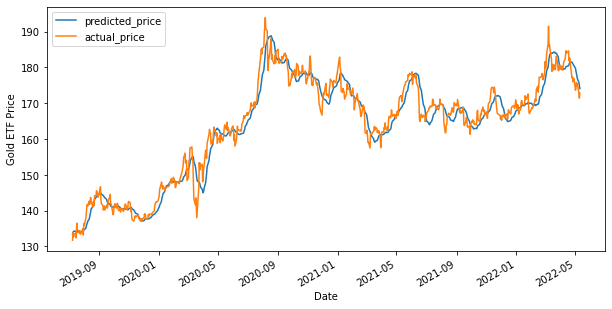

In [11]:

predicted_price = reg.predict(X_test) 
predicted_price = pd.DataFrame(predicted_price,index=y_test.index,columns = ['price'])  

predicted_price.plot(figsize=(10,5))  

y_test.plot()  

plt.legend(['predicted_price','actual_price'])  

plt.ylabel("Gold ETF Price")  

plt.show()

**accurancy = r^2 score of the model**

In [12]:

r2_score = reg.score(X[t:],y[t:])*100  

float("{0:.2f}".format(r2_score))

95.14